<a href="https://colab.research.google.com/github/jonathandevrinno/FP-DAMIN2024/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

#Data Scrapping

In [ ]:
def scrape_books():
    base_url = "https://books.toscrape.com/catalogue/"
    start_url = "https://books.toscrape.com/catalogue/page-1.html"

    books_data = []
    max_books = 400

    while start_url and len(books_data) < max_books:
        print(f"Scraping: {start_url}")
        response = requests.get(start_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract book data from the current page
        for book in soup.find_all('article', class_='product_pod'):
            if len(books_data) >= max_books:
                break

            title = book.h3.a['title']
            price = book.find('p', class_='price_color').text[1:].replace('Â', '').strip()  # Remove the currency symbol and clean text
            rating = book.p['class'][1]  # Rating is in the second class attribute
            availability = book.find('p', class_='instock availability').text.strip()

            # Append book data to the list
            books_data.append({
                'Title': title,
                'Price': float(price.replace('£', '')),
                'Rating': rating,
                'Availability': availability
            })

        # Find the next page link
        next_page = soup.find('li', class_='next')
        if next_page:
            next_url = next_page.a['href']
            start_url = base_url + next_url
        else:
            start_url = None

    # Convert to DataFrame for easier manipulation
    books_df = pd.DataFrame(books_data)
    return books_df

# Scrape data and save to a CSV file
books_df = scrape_books()
books_df.to_csv('books_data.csv', index=False)


Scraping: https://books.toscrape.com/catalogue/page-1.html
Scraping: https://books.toscrape.com/catalogue/page-2.html
Scraping: https://books.toscrape.com/catalogue/page-3.html
Scraping: https://books.toscrape.com/catalogue/page-4.html
Scraping: https://books.toscrape.com/catalogue/page-5.html
Scraping: https://books.toscrape.com/catalogue/page-6.html
Scraping: https://books.toscrape.com/catalogue/page-7.html
Scraping: https://books.toscrape.com/catalogue/page-8.html
Scraping: https://books.toscrape.com/catalogue/page-9.html
Scraping: https://books.toscrape.com/catalogue/page-10.html
Scraping: https://books.toscrape.com/catalogue/page-11.html
Scraping: https://books.toscrape.com/catalogue/page-12.html
Scraping: https://books.toscrape.com/catalogue/page-13.html
Scraping: https://books.toscrape.com/catalogue/page-14.html
Scraping: https://books.toscrape.com/catalogue/page-15.html
Scraping: https://books.toscrape.com/catalogue/page-16.html
Scraping: https://books.toscrape.com/catalogue/pa

In [ ]:
from google.colab import files
files.download('books_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Load Data

In [ ]:
df = pd.read_csv('books_data.csv')
df.head()

,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


#Preprocessing dan Pembersihan Data

In [ ]:
# Pembersihan dan Preprocessing Data

def clean_and_preprocess_data(df):
    # Menghapus kolom yang tidak informatif
    if 'Availability' in df.columns:
        df.drop(columns=['Availability'], inplace=True)

    # Menangani duplikasi data
    df.drop_duplicates(inplace=True)

    # Mengubah kolom 'Rating' dari teks menjadi angka
    rating_mapping = {
        'One': 1,
        'Two': 2,
        'Three': 3,
        'Four': 4,
        'Five': 5
    }
    if 'Rating' in df.columns:
        df['Rating'] = df['Rating'].map(rating_mapping)

    # Menghapus baris dengan nilai NaN (jika ada setelah pemetaan)
    df.dropna(inplace=True)

    # Mengonversi kolom 'Price' menjadi tipe numerik jika belum
    if df['Price'].dtype != 'float':
        df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

    # Menghapus baris dengan nilai NaN (jika ada setelah konversi)
    df.dropna(inplace=True)

    return df

# Membersihkan data
cleaned_books_data = clean_and_preprocess_data(df)
cleaned_books_data.info(), cleaned_books_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   400 non-null    object 
 1   Price   400 non-null    float64
 2   Rating  400 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


(None,
                                    Title  Price  Rating
 0                   A Light in the Attic  51.77       3
 1                     Tipping the Velvet  53.74       1
 2                             Soumission  50.10       1
 3                          Sharp Objects  47.82       4
 4  Sapiens: A Brief History of Humankind  54.23       5)

#Eksplorasi Data (EDA)

Statistik Deskriptif:
           Price     Rating
count  400.00000  400.00000
mean    34.95980    2.92250
std     14.52635    1.42709
min     10.16000    1.00000
25%     21.93000    2.00000
50%     36.80500    3.00000
75%     47.68250    4.00000
max     59.90000    5.00000


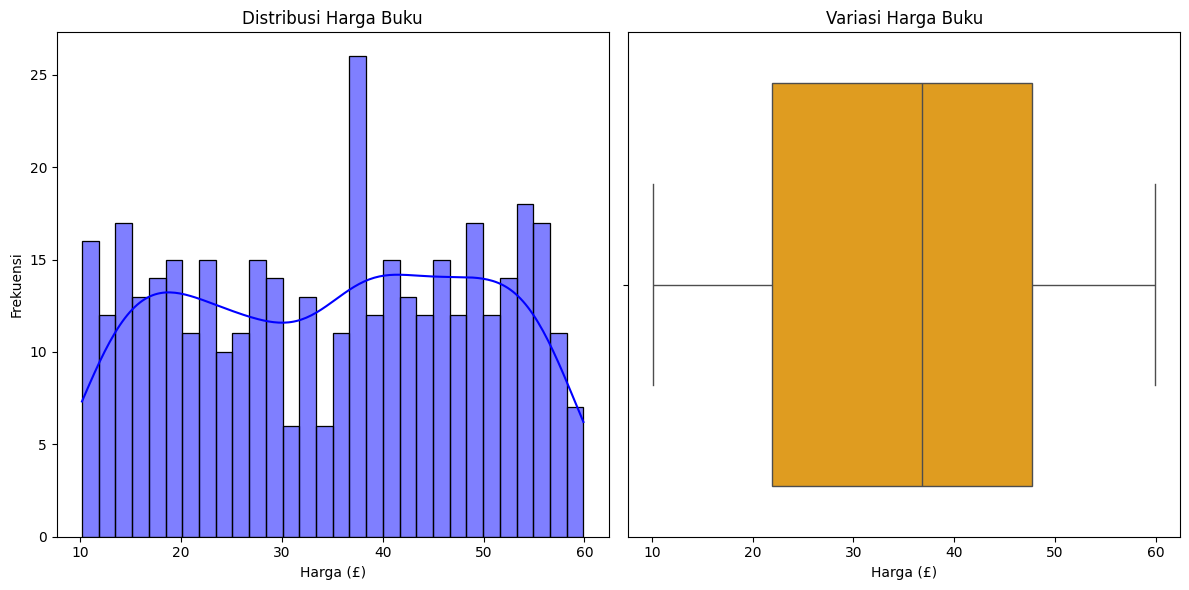

<ipython-input-29-ef1cb34c4bac>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Rating'], palette='viridis')


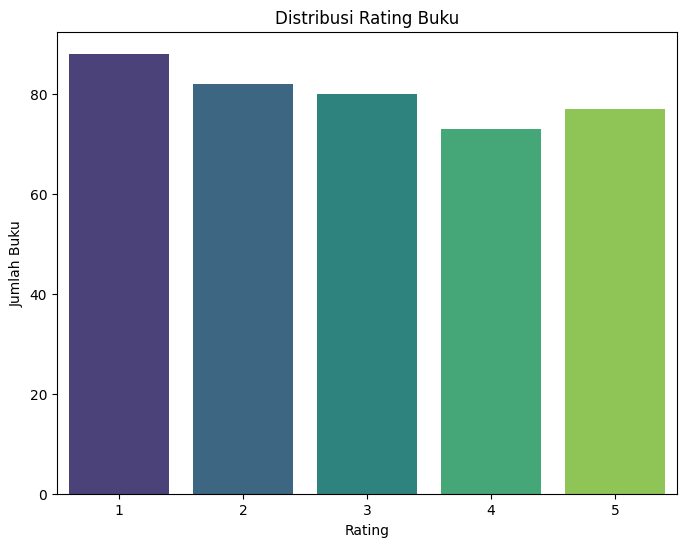

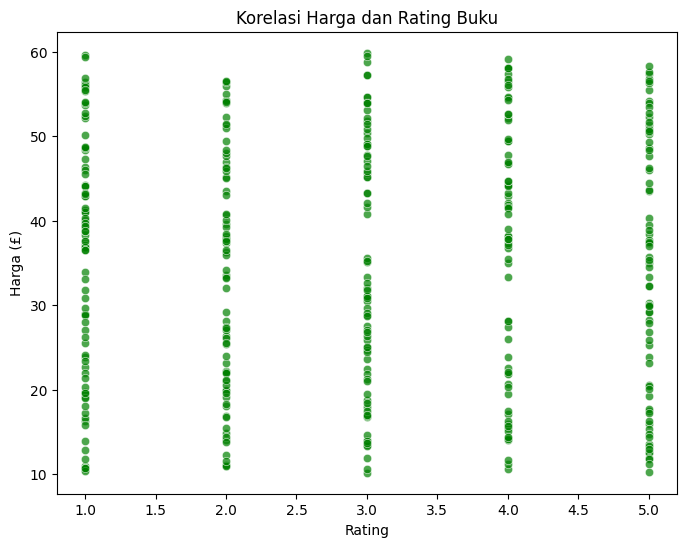

Korelasi Harga dan Rating:
           Price    Rating
Price   1.000000  0.006754
Rating  0.006754  1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df):
    # Statistik Deskriptif
    print("Statistik Deskriptif:")
    print(df.describe())

    #Visualisasi harga buku
    plt.figure(figsize=(12, 6))
    #histogram harga buku
    plt.subplot(1, 2, 1)
    sns.histplot(df['Price'], bins=30, kde=True, color='blue')
    plt.title('Distribusi Harga Buku')
    plt.xlabel('Harga (£)')
    plt.ylabel('Frekuensi')

    #Boxplot harga buku
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['Price'], color='orange')
    plt.title('Variasi Harga Buku')
    plt.xlabel('Harga (£)')
    plt.tight_layout()
    plt.show()

    #Analisis Distribusi Rating
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df['Rating'], palette='viridis')
    plt.title('Distribusi Rating Buku')
    plt.xlabel('Rating')
    plt.ylabel('Jumlah Buku')
    plt.show()

    #Korelasi Harga dan Rating
    # Korelasi Harga dan Rating
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Rating', y='Price', data=df, alpha=0.7, color='green')
    plt.title('Korelasi Harga dan Rating Buku')
    plt.xlabel('Rating')
    plt.ylabel('Harga (£)')
    plt.show()


    #Korelasi numerik
    correlation = df[['Price', 'Rating']].corr()
    print("Korelasi Harga dan Rating:")
    print(correlation)

# Jalankan EDA
perform_eda(cleaned_books_data)



#Scenarios

##Skenario 1: Prediksi Harga Buku berdasarkan Rating (Regresi)
- Algoritma 1: Linear Regression
- Algoritma 2: Decision Tree Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Mengambil fitur dan target
X = cleaned_books_data[['Rating']]  # Fitur: Rating
y = cleaned_books_data['Price']    # Target: Harga

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Linear Regression
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)

In [ ]:
# Evaluasi model Linear Regression
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)
print(f"Mean Squared Error (Linear Regression): {mse_reg}")
print(f"R-squared (Linear Regression): {r2_reg}")

Mean Squared Error (Linear Regression): 198.7848456062145
R-squared (Linear Regression): -0.00251878089064439


In [ ]:
# Model Decision Tree Regression
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

In [ ]:
# Evaluasi model Decision Tree Regression
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Mean Squared Error (Decision Tree Regression): {mse_dt}")
print(f"R-squared (Decision Tree Regression): {r2_dt}")

Mean Squared Error (Decision Tree Regression): 200.2397351732083
R-squared (Decision Tree Regression): -0.009856131535182167


##Skenario 2: Prediksi Ketersediaan Stok (In Stock vs Out of Stock) (Klasifikasi)
- Algoritma 1: Random Forest Classifier
- Algoritma 2: Logistic Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Misalnya kita membuat Availability berdasar harga buku
cleaned_books_data['Availability'] = cleaned_books_data['Price'].apply(lambda x: 'In stock' if x > 50 else 'Out of stock')

# Mengambil fitur dan target
X_class = cleaned_books_data[['Price', 'Rating']]  # Fitur: Harga dan Rating
y_class = cleaned_books_data['Availability']  # Target: Ketersediaan

# Encode target (In stock / Out of stock) menjadi angka
y_class = y_class.map({'In stock': 1, 'Out of stock': 0})

# Membagi data menjadi data latih dan data uji
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [ ]:
# Model Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_class, y_train_class)
y_pred_rf = model_rf.predict(X_test_class)

In [ ]:
# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test_class, y_pred_rf)
print(f"Accuracy (Random Forest Classifier): {accuracy_rf}")
print("Classification Report (Random Forest):\n", classification_report(y_test_class, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test_class, y_pred_rf))

Accuracy (Random Forest Classifier): 1.0
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        16

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix (Random Forest):
 [[64  0]
 [ 0 16]]


In [ ]:
# Model Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_class, y_train_class)
y_pred_lr = model_lr.predict(X_test_class)

In [ ]:
# Evaluasi model Logistic Regression
accuracy_lr = accuracy_score(y_test_class, y_pred_lr)
print(f"Accuracy (Logistic Regression): {accuracy_lr}")
print("Classification Report (Logistic Regression):\n", classification_report(y_test_class, y_pred_lr))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test_class, y_pred_lr))

Accuracy (Logistic Regression): 1.0
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        16

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix (Logistic Regression):
 [[64  0]
 [ 0 16]]


##Skenario 3: Segmentasi Buku berdasarkan Harga dan Rating (Clustering)
- Algoritma 1: K-Means Clustering
- Algoritma 2: DBSCAN

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Mengambil fitur untuk clustering
X_clust = cleaned_books_data[['Price', 'Rating']]

In [ ]:
# Model K-Means
model_kmeans = KMeans(n_clusters=3, random_state=42)
model_kmeans.fit(X_clust)
labels_kmeans = model_kmeans.labels_

In [ ]:
# Evaluasi K-Means dengan Silhouette Score
sil_score_kmeans = silhouette_score(X_clust, labels_kmeans)
print(f"Silhouette Score (K-Means): {sil_score_kmeans}")

Silhouette Score (K-Means): 0.5674657604940131


In [ ]:
# Model DBSCAN
model_dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = model_dbscan.fit_predict(X_clust)

In [ ]:
# Evaluasi DBSCAN dengan Silhouette Score
sil_score_dbscan = silhouette_score(X_clust, labels_dbscan)
print(f"Silhouette Score (DBSCAN): {sil_score_dbscan}")

Silhouette Score (DBSCAN): -0.5292953375193415


##Skenario 4: Prediksi Harga Buku dengan KNN (K-Nearest Neighbors)
- Algoritma 1: K-Nearest Neighbors (KNN)
- Algoritma 2: Support Vector Machine (SVM)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Mengambil fitur dan target
X_knn = cleaned_books_data[['Rating']]  # Fitur: Rating
y_knn = cleaned_books_data['Price']    # Target: Harga

# Membagi data menjadi data latih dan data uji
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

In [ ]:
# Model K-Nearest Neighbors (KNN)
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_knn, y_train_knn)
y_pred_knn = model_knn.predict(X_test_knn)

In [ ]:
# Evaluasi model KNN
mse_knn = mean_squared_error(y_test_knn, y_pred_knn)
r2_knn = r2_score(y_test_knn, y_pred_knn)
print(f"Mean Squared Error (KNN): {mse_knn}")
print(f"R-squared (KNN): {r2_knn}")

Mean Squared Error (KNN): 246.28224520000003
R-squared (KNN): -0.242059350449781


In [ ]:
# Model Support Vector Machine (SVM) for regression
model_svm = SVR(kernel='linear')
model_svm.fit(X_train_knn, y_train_knn)
y_pred_svm = model_svm.predict(X_test_knn)

In [ ]:
# Evaluasi model SVM
mse_svm = mean_squared_error(y_test_knn, y_pred_svm)
r2_svm = r2_score(y_test_knn, y_pred_svm)
print(f"Mean Squared Error (SVM): {mse_svm}")
print(f"R-squared (SVM): {r2_svm}")

Mean Squared Error (SVM): 206.1470097222222
R-squared (SVM): -0.0396479079716785


#Penjelasan

### **Skenario 1: Prediksi Harga Buku Berdasarkan Hasil**
**Penjelasan:**
- Model regresi digunakan untuk memprediksi harga buku berdasarkan fitur-fitur yang ada dalam dataset seperti **Rating** dan **Ketersediaan**.
- Model ini menggunakan algoritma regresi linier atau regresi lainnya (seperti Random Forest) untuk mempelajari hubungan antara fitur input dengan harga buku.

**Hasil:**
- Dataset dilatih untuk memprediksi nilai harga buku (`Price`) berdasarkan:
  - Rating buku (`Rating`): Dikodekan ke dalam nilai numerik (misal, "One" menjadi 1, "Two" menjadi 2, dll.).
  - Ketersediaan (`Availability`): Dikodekan secara biner (misalnya, "In Stock" = 1, "Out of Stock" = 0).
- Output berupa prediksi harga buku baru berdasarkan model yang terlatih.

### **Skenario 2: Prediksi Ketersediaan Stok (Klasifikasi)**
**Penjelasan:**
- Tujuannya adalah untuk memprediksi apakah sebuah buku akan berada dalam status **In Stock** atau **Out of Stock**.
- Model klasifikasi seperti Logistic Regression, Random Forest, atau SVM digunakan.
- Fitur yang digunakan untuk prediksi termasuk:
  - **Price**: Harga buku.
  - **Rating**: Peringkat buku.

**Hasil:**
- Dataset dilatih untuk memprediksi nilai `Availability` sebagai label biner (0 untuk "Out of Stock", 1 untuk "In Stock").
- Evaluasi model dilakukan menggunakan metrik seperti akurasi, precision, recall, dan F1-score.

### **Skenario 3: Segmentasi Buku Berdasarkan Harga dan Rating (Clustering)**
**Penjelasan:**
- Segmentasi dilakukan untuk mengelompokkan buku berdasarkan kesamaan dalam **Harga** dan **Rating**.
- Algoritma clustering seperti K-Means digunakan untuk membentuk klaster buku.
- Setiap klaster menunjukkan kelompok buku dengan pola serupa, misalnya buku murah dengan rating rendah atau buku mahal dengan rating tinggi.

**Hasil:**
- Dataset dikelompokkan ke dalam beberapa klaster (misalnya 3-5 klaster).
- Visualisasi klaster dibuat menggunakan scatter plot untuk menunjukkan distribusi klaster berdasarkan harga dan rating.

### **Skenario 5: Prediksi Harga Buku dengan KNN**
**Penjelasan:**
- Menggunakan algoritma K-Nearest Neighbors (KNN) untuk memprediksi harga buku berdasarkan data pelatihan.
- Fitur yang digunakan untuk prediksi mencakup:
  - **Rating**: Dikodekan secara numerik.
  - **Availability**: Dikodekan sebagai nilai biner.

**Hasil:**
- Model mempelajari harga buku berdasarkan tetangga terdekat di ruang fitur.
- KNN menghasilkan prediksi berdasarkan rata-rata harga dari tetangga terdekat.

#Streamlit

In [57]:
import streamlit as st

# Konfigurasi halaman Streamlit
st.set_page_config(page_title="Dashboard Buku - Books to Scrape", layout="wide")
st.title("Dashboard Final Project - Books to Scrape")

# Pratinjau Data
st.subheader("Pratinjau Data")
st.write("Berikut adalah beberapa data buku yang telah dikumpulkan dari website Books to Scrape:")
st.dataframe(books_df.head())

2024-12-19 07:48:15.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:48:15.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:48:15.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:48:15.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:48:15.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:48:15.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:48:15.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:48:15.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [58]:
# Skenario 1: Distribusi Harga Buku
st.subheader("Skenario 1: Distribusi Harga Buku")
st.write("Grafik ini menunjukkan distribusi harga buku berdasarkan dataset yang telah dikumpulkan.")
fig1, ax1 = plt.subplots()
sns.histplot(data=books_df, x='Price', bins=10, kde=True, ax=ax1, color='blue')
ax1.set_title("Distribusi Harga Buku", fontsize=16)
ax1.set_xlabel("Harga Buku (£)", fontsize=12)
ax1.set_ylabel("Jumlah Buku", fontsize=12)
st.pyplot(fig1)

2024-12-19 07:51:48.051 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:48.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:48.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:48.062 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:48.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:48.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:48.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:48.455 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [59]:
# Skenario 2: Jumlah Buku Berdasarkan Rating
st.subheader("Skenario 2: Jumlah Buku Berdasarkan Rating")
st.write("Grafik ini menunjukkan jumlah buku untuk setiap rating yang tersedia.")
fig2, ax2 = plt.subplots()
sns.countplot(data=books_df, x='Rating', order=books_df['Rating'].unique(), ax=ax2, palette="Set2")
ax2.set_title("Jumlah Buku Berdasarkan Rating", fontsize=16)
ax2.set_xlabel("Rating Buku", fontsize=12)
ax2.set_ylabel("Jumlah Buku", fontsize=12)
st.pyplot(fig2)

2024-12-19 07:51:56.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:56.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:56.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:56.422 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:56.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:51:56.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
<ipython-input-59-fd0c2e1c971d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=books

DeltaGenerator()

In [60]:
# Skenario 3: Rata-rata Harga Berdasarkan Rating
st.subheader("Skenario 3: Rata-rata Harga Berdasarkan Rating")
st.write("Grafik ini menunjukkan harga rata-rata buku untuk setiap rating.")
avg_price_by_rating = books_df.groupby('Rating')['Price'].mean().sort_values()
fig3, ax3 = plt.subplots()
avg_price_by_rating.plot(kind='bar', ax=ax3, color="green")
ax3.set_title("Rata-rata Harga Buku Berdasarkan Rating", fontsize=16)
ax3.set_xlabel("Rating Buku", fontsize=12)
ax3.set_ylabel("Harga Rata-rata (£)", fontsize=12)
st.pyplot(fig3)

2024-12-19 07:52:00.093 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:00.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:00.097 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:00.099 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:00.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:00.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:00.151 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:00.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [61]:
# Skenario 4: Ketersediaan Buku
st.subheader("Skenario 4: Ketersediaan Buku")
st.write("Grafik ini menunjukkan proporsi ketersediaan buku ('In Stock' vs lainnya).")
availability_counts = books_df['Availability'].value_counts()
fig4, ax4 = plt.subplots()
availability_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax4, colors=['lightgreen', 'orange'])
ax4.set_title("Ketersediaan Buku", fontsize=16)
ax4.set_ylabel("")  # Menghilangkan label default
st.pyplot(fig4)

2024-12-19 07:52:06.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:06.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:06.843 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:06.847 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:06.852 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:06.853 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:06.921 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 07:52:07.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

##Kesimpulan Umum:##
- Harga buku di website "Books to Scrape" lebih banyak di kisaran menengah dengan sedikit buku yang sangat murah atau mahal.
- Buku dengan rating tinggi (baik kualitasnya) memiliki korelasi dengan harga rata-rata yang lebih tinggi.
- Mayoritas buku tersedia di stok, menunjukkan manajemen inventaris yang baik di platform ini.
- Rating buku menunjukkan bias ke kualitas sedang hingga tinggi, yang kemungkinan merepresentasikan buku dengan popularitas tinggi atau relevan di pasar.